In [1]:
!pip install BioPython

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\aamar\\Downloads')

In [15]:
from Bio import SeqIO

covid_ref = SeqIO.read('covid.fasta', "fasta")
omicron_ref = SeqIO.read('omicron.fasta', "fasta")

covid_ref = covid_ref.seq
omicron_ref = omicron_ref.seq

In [16]:
len(omicron_ref)

29684

In [8]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
alignments = pairwise2.align.globalxx(covid_ref[0:100], omicron_ref[0:100])
print(format_alignment(*alignments[0]))

ATTAAAGGTTTATACCT-TC-C-CAGGTAACA--AACC---AACCAA-CT-T-T--C-GATCT-CTT-G--TAG-AT-CTGT--T-CT-CTAA-ACG-A--ACT--TTAA-AATCTG--TGTGG-CTGTCAC-TC-
     | |   ||  || |  | |   ||| |  || |   ||  || || | |  | | ||  | | |  | | || || |  | |  ||   ||| |  | |  |||| || ||   | |   ||||  | |  
-----A-G---AT--CTGT-TCTC---TAA-ACGAA-CTTTAA--AATCTGTGTGGCTG-TC-AC-TCGGCT-GCATGCT-TAGTGC-ACT--CACGCAGTA-TAATTAATAA-CT-AAT-T--ACTGT--CGT-T
  Score=64



In [38]:
omicron_spike_dna = omicron_ref[21496:25309]

In [40]:
covid_spike_dna = covid_ref[21562:25384]

In [205]:
len(omicron_spike_dna)

3813

In [60]:
spike_dna_alignment = pairwise2.align.globalxx(omicron_spike_dna, covid_spike_dna)

In [87]:
import pandas as pd
covid_spike = []
spike = pd.read_csv("spiketest.txt")
for i in spike:
    covid_spike.append(i)
omicron_spike = []
spike2 = pd.read_csv("spiketestomicron.txt")
for i in spike2:
    omicron_spike.append(i)
covid_spike = Seq(covid_spike[0])
omicron_spike = Seq(omicron_spike[0])

In [232]:
alignments = pairwise2.align.globalxx(covid_spike[0:100], omicron_spike[0:100])
print(format_alignment(*alignments[0]))
alignments[0][1][0]


MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHV-SGTNGTKRFDNPVLPFNDGVYFAST-EKSNI--
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||   || ||||||||||||||||||||||||  |||||  
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWF---HVISGTNGTKRFDNPVLPFNDGVYFAS-IEKSNIIR
  Score=96



'M'

In [252]:
alignments2 = pairwise2.align.globalms(covid_spike, omicron_spike, 1, -1, -1, -0.5)
def index_changes(alignment):
    mutation_count = 0
    for i in range(0,len(alignment[0][0])):
        if alignment[0][0][i] == "-" or alignment[0][1][i] == "-":
            print("Residue", str(i+1), "is an insert/deletion")
            print(alignment[0][0][i], " > ", alignment[0][1][i])
            mutation_count += 1
        elif alignment[0][0][i] != alignment[0][1][i]:
            print("Residue", str(i+1), "is a mismatch")
            print(alignment[0][0][i], " > ", alignment[0][1][i])
            mutation_count += 1
    print("Final Mutation Count =", str(mutation_count))    
index_changes(alignments2)

Residue 67 is a mismatch
A  >  V
Residue 69 is an insert/deletion
H  >  -
Residue 70 is an insert/deletion
V  >  -
Residue 95 is a mismatch
T  >  I
Residue 142 is an insert/deletion
G  >  -
Residue 143 is an insert/deletion
V  >  -
Residue 144 is an insert/deletion
Y  >  -
Residue 145 is a mismatch
Y  >  D
Residue 211 is an insert/deletion
N  >  -
Residue 212 is a mismatch
L  >  I
Residue 215 is an insert/deletion
-  >  E
Residue 216 is an insert/deletion
-  >  P
Residue 217 is an insert/deletion
-  >  E
Residue 311 is a mismatch
V  >  X
Residue 312 is a mismatch
E  >  X
Residue 342 is a mismatch
G  >  D
Residue 374 is a mismatch
S  >  X
Residue 375 is a mismatch
A  >  X
Residue 376 is a mismatch
S  >  P
Residue 378 is a mismatch
S  >  F
Residue 420 is a mismatch
K  >  N
Residue 443 is a mismatch
N  >  K
Residue 449 is a mismatch
G  >  S
Residue 480 is a mismatch
S  >  N
Residue 481 is a mismatch
T  >  K
Residue 487 is a mismatch
E  >  A
Residue 496 is a mismatch
Q  >  R
Residue 499 is

In [427]:
alignments2

[Alignment(seqA='MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVR---DLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDI

In [102]:
## Counting Residues

covid_spike_residue_counts = {}
omicron_spike_residue_counts = {}
for i in covid_spike:
    if i not in covid_spike_residue_counts.keys():
        covid_spike_residue_counts[i] = 1
    else:
        covid_spike_residue_counts[i] += 1

for i in omicron_spike:
    if i not in omicron_spike_residue_counts.keys():
        omicron_spike_residue_counts[i] = 1
    else:
        omicron_spike_residue_counts[i] += 1
        


In [132]:
import pandas as pd
covid_df = pd.DataFrame.from_dict(covid_spike_residue_counts, orient = "index", columns = ["Reference"])
omicron_df = pd.DataFrame.from_dict(omicron_spike_residue_counts, orient = "index", columns = ["Omicron"])
joined_df = covid_df.join(omicron_df, lsuffix='Reference', rsuffix='Omicron')
joined_df["Difference"] = joined_df["Reference"] - joined_df["Omicron"]

In [182]:
amino_acids = ["Met", "Phe", "Val", "Leu", "Pro", "Ser", 
              "Gln", "Cys", "Asn", "Thr", "Arg", "Ala",
              "Tyr", "Gly", "Asp", "Lys", "His", "Trp",
              "Ile", "Glu"]

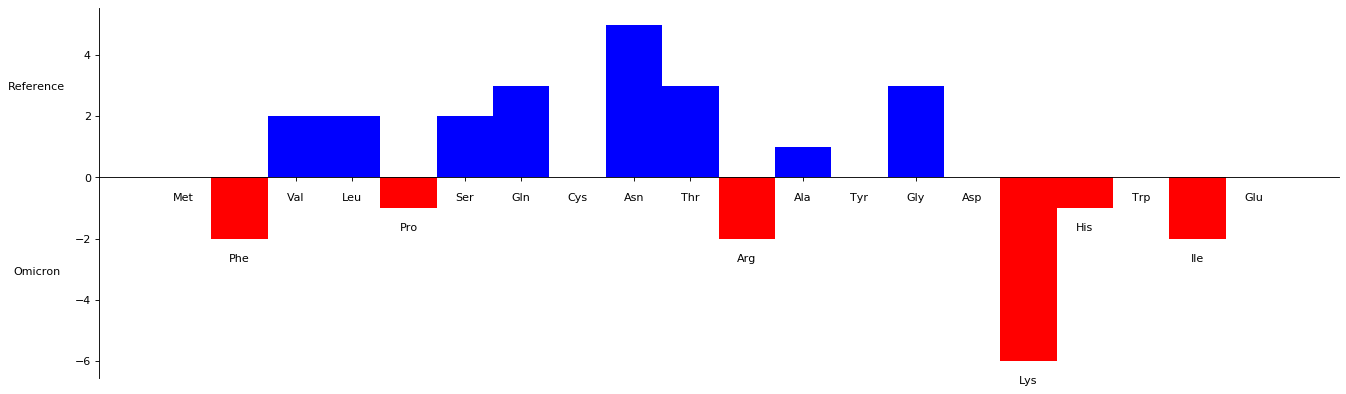

In [420]:
import matplotlib.pyplot as plt 
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
figure(figsize=(20, 6), dpi=80)
objects = amino_acids
y_pos = np.arange(len(objects))
differences = joined_df["Difference"]

plt.bar(y_pos, differences, align='center', alpha=1, color = "rrbbrbbbbbrbbbrrrr", width = 1)
# Get the axes object
ax = plt.gca()
# remove the existing ticklabels
ax.set_xticklabels([])
# remove the extra tick on the negative bar
ax.set_xticks([idx for (idx, x) in enumerate(performance) if x > 0])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# placing each of the x-axis labels individually
label_offset = 0.5
for language, (x_position, y_position) in zip(objects, enumerate(differences)):
    if y_position > 0:
        label_y = -label_offset
    else:
        label_y = y_position - label_offset
    ax.text(x_position, label_y, language, ha="center", va="top")
# Placing the x-axis label, note the transformation into `Axes` co-ordinates
# previously data co-ordinates for the x ticklabels
ax.text(-0.05, 0.30, "Omicron", ha="center", va="top", transform=ax.transAxes)
ax.text(-0.05, 0.80, "Reference", ha="center", va="top", transform=ax.transAxes)


#plt.show()
plt.savefig("amino_acids.png")

In [426]:
joined_df["Difference"].abs().sum()

35

In [204]:
len(omicron_spike)

1270

In [343]:
!pip install adjustText

  Stored in directory: C:\Users\aamar\AppData\Local\pip\Cache\wheels\41\95\74\7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


42


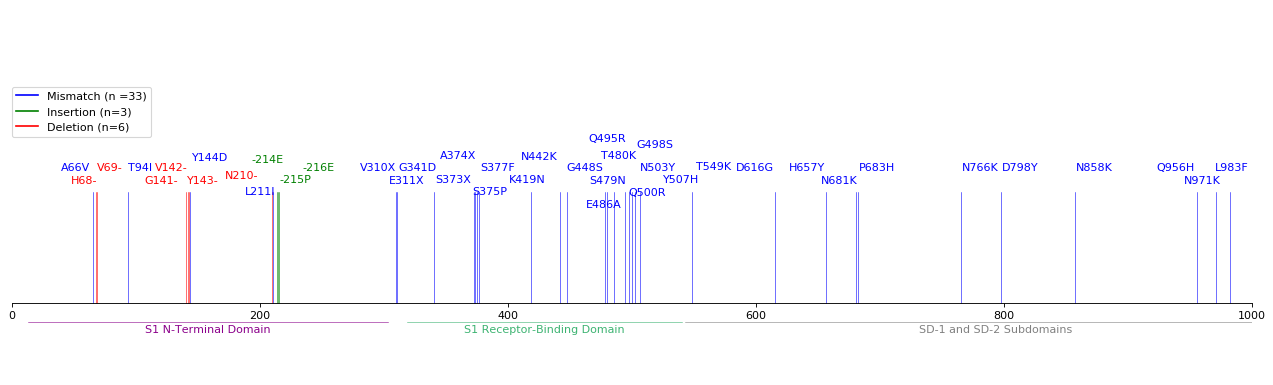

In [430]:
#from matplotlib.pyplot import figure

#from adjustText import adjust_text
alignments2 = pairwise2.align.globalms(covid_spike, omicron_spike, 1, -0.5, -1, -0.5)
def generate_mutation_plot(alignment):
    figure(figsize=(20, 6), dpi=80)
    ax = plt.gca()
    ax.spines["bottom"].set_position(("data", 0.2))
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1)
    #draw lines
    mutation_count = 0
    texts = []
    deletions = 0
    insertions = 0
    mismatches = 0
    for i in range(0,len(alignment[0][0])):
        if alignment[0][0][i] == "-":
            plt.plot([i, i], [0.2, 0.5], 'k-', lw=0.5, color = 'g')
            texts.append((plt.text(x = i, y = 0.55, s = (str(alignment[0][0][i]) + str(i) + str(alignment[0][1][i])), color = 'g')))
            insertions += 1
        elif alignment[0][1][i] == "-":
            plt.plot([i, i], [0.2, 0.5], 'k-', lw=0.5, color = 'r')
            texts.append((plt.text(x = i, y = 0.55, s = (str(alignment[0][0][i]) + str(i) + str(alignment[0][1][i])), color = 'r')))
            deletions += 1
        elif alignment[0][0][i] != alignment[0][1][i]:
            plt.plot([i, i], [0.2, 0.5], 'k-', lw=0.5, color = 'b')
            texts.append(plt.text(x = i, y = 0.55, s = (str(alignment[0][0][i]) + str(i) + str(alignment[0][1][i])), color = 'b'))
            mismatches += 1
            
    adjust_text(texts)
    plt.plot("-b", label="Mismatch (n =" + str(mismatches) + ")", alpha = 1, color = "blue")
    plt.plot("-g", label="Insertion (n=" + str(insertions) + ")", alpha = 1, color = "green")
    plt.plot("-r", label = "Deletion (n=" + str(deletions) + ")", alpha=1, color = "red")
    plt.legend(loc=(0, 0.65))
    #region/domain annotations
    plt.plot([13,304], [0.15, 0.15], 'k-', lw=0.5, color = "darkmagenta")
    ntd = "S1 N-Terminal Domain"
    plt.text(x = round((304+13)/2) - len(ntd) * 2.5, y = 0.12, s = ntd, color = "darkmagenta")
    plt.plot([319,541], [0.15, 0.15], 'k-', lw=0.5, color = "mediumseagreen")
    rbd = "S1 Receptor-Binding Domain"
    plt.text(x = round((319+541)/2) - len(rbd) * 2.5, y = 0.12, s = rbd, color = "mediumseagreen")
    plt.plot([543,1208], [0.15, 0.15], 'k-', lw=0.5, color = "gray")
    sd12 = "SD-1 and SD-2 Subdomains"
    plt.text(x = round((543+1208)/2) - len(sd12) * 6, y = 0.12, s = sd12, color = "gray")
    print(mismatches + insertions + deletions)
    plt.savefig("mutations_plot.png")
            
            

generate_mutation_plot(alignments2)
